# Customer Churn Prediction 

[Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn) dataset taken from Kaggle.

## Explore Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

Let's check for null values

In [4]:
df.isna().sum().sum()

0

We see that 1869 customers churned or 26.5%. 

In [82]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Examine Features

Let's look at some of the features vs. churn. 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

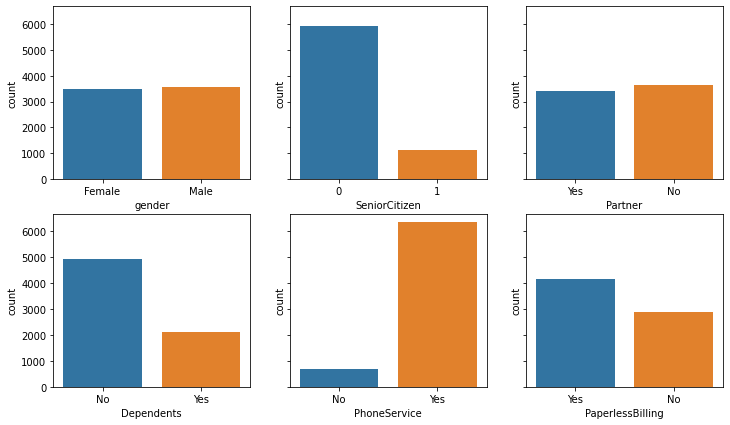

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(x="gender", data=df, ax=axes[0,0])
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot(x="Partner", data=df, ax=axes[0,2])
sns.countplot(x="Dependents", data=df, ax=axes[1,0])
sns.countplot(x="PhoneService", data=df, ax=axes[1,1])
sns.countplot(x="PaperlessBilling", data=df, ax=axes[1,2])

Assign numeric value to churn for analysis.

In [87]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [88]:
print(df[['gender','Churn']].groupby(['gender']).mean(),
        df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean(), 
        df[['Partner','Churn']].groupby(['Partner']).mean(), 
        df[['Dependents','Churn']].groupby(['Dependents']).mean(), 
        df[['PhoneService','Churn']].groupby(['PhoneService']).mean(), 
        df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()
     )

           Churn
gender          
Female  0.269209
Male    0.261603                   Churn
SeniorCitizen          
0              0.236062
1              0.416813             Churn
Partner          
No       0.329580
Yes      0.196649                Churn
Dependents          
No          0.312791
Yes         0.154502                  Churn
PhoneService          
No            0.249267
Yes           0.267096                      Churn
PaperlessBilling          
No                0.163301
Yes               0.335651


In [32]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


<AxesSubplot:xlabel='InternetService', ylabel='count'>

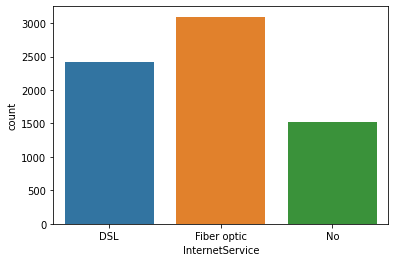

In [97]:
sns.countplot(x="InternetService", data=df)

In [34]:
df[['InternetService', 'Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [35]:
df[['InternetService', 'MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

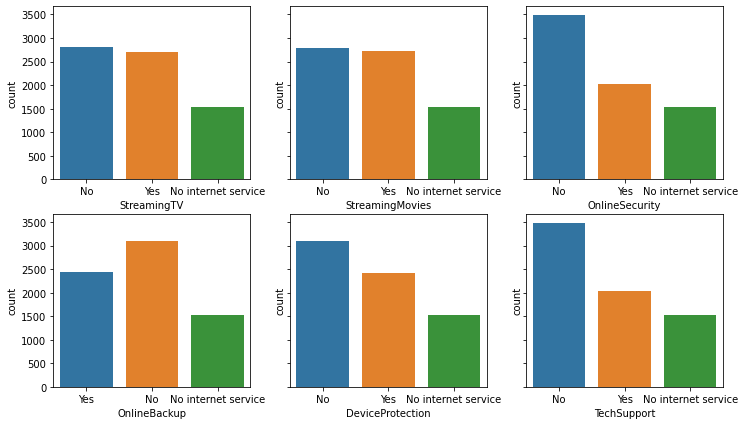

In [90]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot(x="StreamingTV", data=df, ax=axes[0,0])
sns.countplot(x="StreamingMovies", data=df, ax=axes[0,1])
sns.countplot(x="OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot(x="OnlineBackup", data=df, ax=axes[1,0])
sns.countplot(x="DeviceProtection", data=df, ax=axes[1,1])
sns.countplot(x="TechSupport", data=df, ax=axes[1,2])

In [39]:
print(df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean(),
        df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean(), 
        df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean(), 
        df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean(), 
        df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean(), 
        df[['TechSupport','Churn']].groupby(['TechSupport']).mean()
     )

                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702                         Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414                         Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112                         Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315                         Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021                         Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663


In [40]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [41]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [42]:
df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


<AxesSubplot:xlabel='Contract', ylabel='count'>

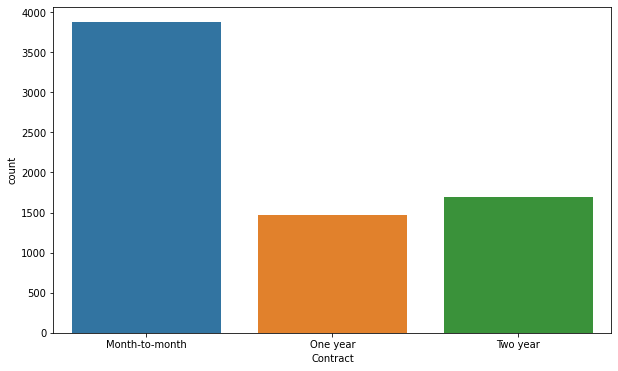

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(x="Contract", data=df)

In [44]:
df[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

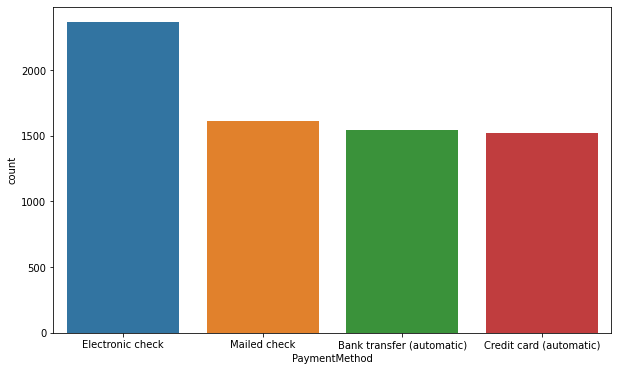

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(x="PaymentMethod", data=df)

In [46]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

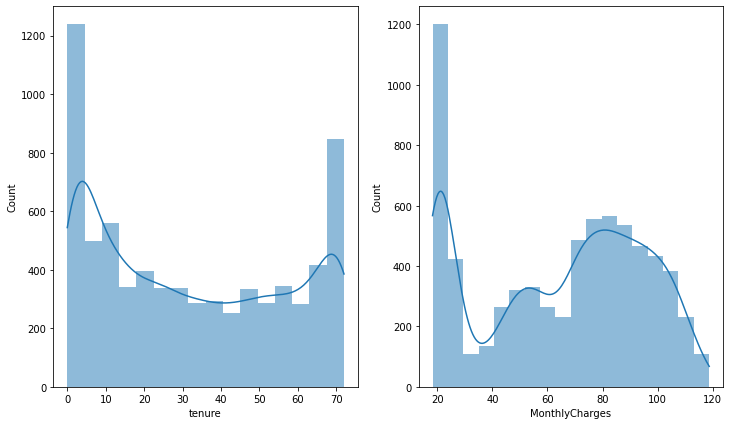

In [94]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.histplot(df["tenure"], ax=axes[0], kde=True, linewidth=0)
sns.histplot(df["MonthlyCharges"], ax=axes[1], kde=True, linewidth=0)

In [49]:
df[['tenure', 'MonthlyCharges', 'Churn']].groupby(['Churn']).mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [50]:
df[['Contract','tenure']].groupby(['Contract']).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


In [52]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

## Data Preprocessing

In [53]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [56]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
                'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [57]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [58]:
X.shape

(7043, 26)

Text(0.5, 1.0, 'Class Distribution Before Resampling')

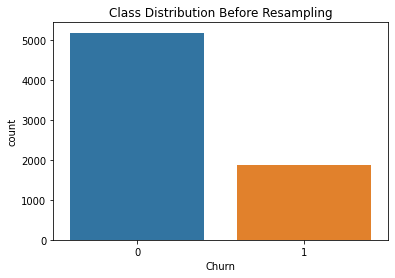

In [99]:
sns.countplot(x='Churn', data=df).set_title('Class Distribution Before Resampling')

In [60]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [61]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


Text(0.5, 1.0, 'Class Distribution After Resampling')

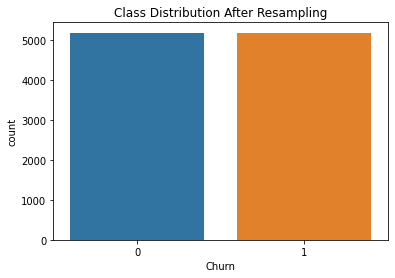

In [95]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot(x='Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

## Model Creatation

In [63]:
from sklearn.model_selection import train_test_split

X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Ridge Classifier

In [65]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [66]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

In [67]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7574293307562213

In [68]:
pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.7608695652173914

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [71]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8833051461705727

In [72]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.842512077294686

## Improving the Model with GridSearch

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [75]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [76]:
clf.best_params_
{'max_depth': 20, 'n_estimators': 150}
clf.best_score_

0.8989180518488944